# Projeto Ciência de Dados - Previsão de Vendas utilizando Inteligência Artificial

As informações que vão alimetar o código, serão dados dos investimentos em propaganda em diferentes canais e as vendas decorrentes desses investimentos.

### Objetivo:

Conseguir prever as vendas que será obtido em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag Investe: TV, Jornal e Rádio.

Baseada nesse modelo, será projetado (com algum grau de incerteza) a quantidade em vendas baseada nos valores investidos.

### Passo a passo de um Projeto de Ciências de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados (importar base de dados)
- Passo 4: Ajustes de Dados (Limpeza de Dados)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial)
- Passo 7: Interpretação do Resultado
- Passo 8: Deploy/Produção


### Importar o Banco de Dados

In [1]:
import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### Análise de Dados

- Tentar visualizar como as informações de cada item estão distribuídas
- Ver a correlação entre vada um dos itens

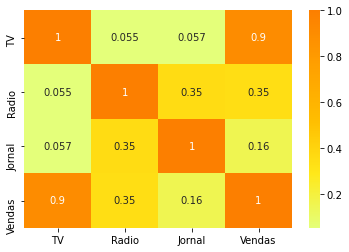

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(tabela.corr(), annot = True, cmap = "Wistia") #exibir a correlação das informações da tabela - "annot" mostra os valores da correlação - "cmap" muda a cor
plt.show() #como o sns foi criado com o matplotlib você sempre primeiro: informa as informações que o gráfico precisa e depois chama ele como plt

O gráfico mostra que ***provavelmente*** o investimento na TV causa maior impacto e que em sequência é a TV depois o Rádio e depois o Jornal

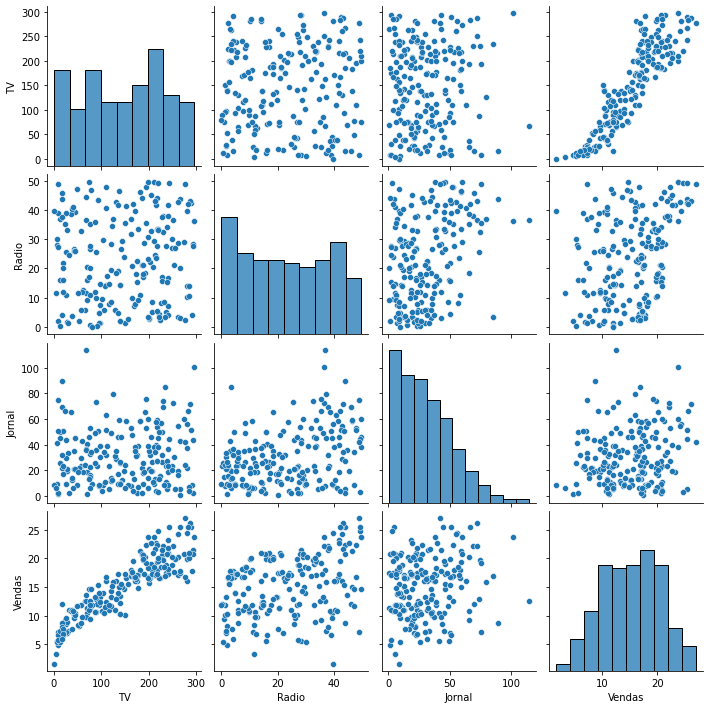

In [3]:
sns.pairplot(tabela)
plt.show()

### Duas coisas para reparar na correlação:

- Quem são as características que tem mais correlação com as vendas
- As características entre elas não pode ter uma correlação muito alta para não ter problema na IA

Características são as informações que você vai usar para fazer a previsão

### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Marching Learning

- Separando os dados de treino e os dados de teste

In [4]:
from sklearn.model_selection import train_test_split

y = tabela["Vendas"]
x = tabela.drop('Vendas', axis=1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

### Temos um problema de regressão - Escolher o modelo que vamos usar:

- Regressão linear
- RandomForest (Árvore de Decisão)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Criar as inteligências artificíais 
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# Treinar as inteligências artificíais
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

### Teste da IA e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [6]:
from sklearn import metrics

# Criar as previsões
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# Comparar os modelos
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))

0.9071151423684274
0.9627159402724647


### Visualização gráfica das previsões

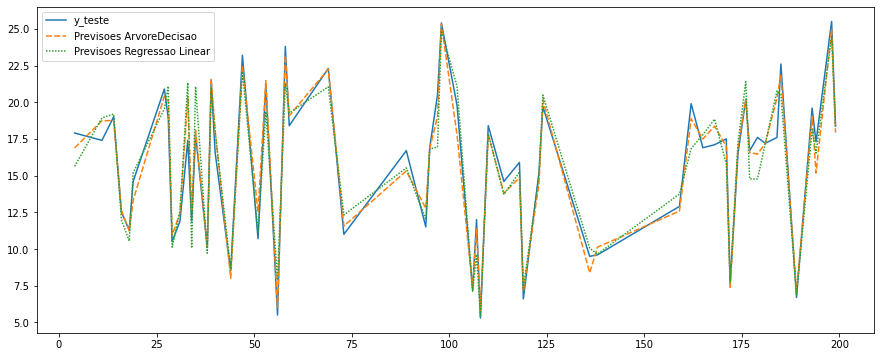

In [7]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

Mostra que o laranja acerta mais que o verde, logo é o modelo mais indicado

### Qual a importância de cada variável para as vendas?

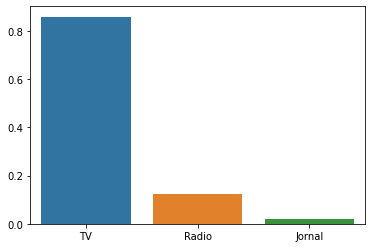

In [10]:
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()

O gráfico mostra que investir em TV é mais importante para o aumento das vendas